In [8]:
import numpy as np
import networkx as nx

In [9]:
data = open('data.txt').read().splitlines()
data = [elem.split('-') for elem in data]

In [10]:
G = nx.DiGraph() # directed graph

for path in data:
    cave_a, cave_b = path

    if cave_a == 'start':
        G.add_edge(cave_a,cave_b)
        
    if cave_b == 'start':
        G.add_edge(cave_b,cave_a)
        
    if cave_a == 'end':
        G.add_edge(cave_b,cave_a)
        
    if cave_b == 'end':
        G.add_edge(cave_a,cave_b)
        
    if cave_a.isupper() or cave_b.isupper():
        if cave_a != 'start' and cave_b != 'start':
            if cave_a != 'end' and cave_b != 'end':
                G.add_edge(cave_a,cave_b)
                G.add_edge(cave_b,cave_a)
    else: 
        G.add_edge(cave_a,cave_b)

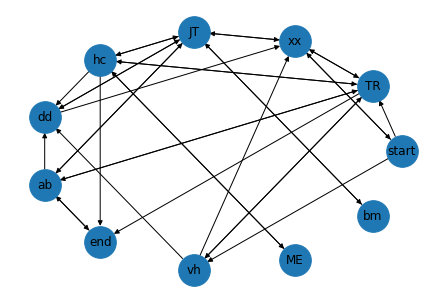

In [11]:
nx.draw_circular(G, node_size=1000, with_labels=True)

In [6]:
paths = nx.all_simple_paths(G, 'start', 'end')

In [7]:
list(paths)

[['start', 'A', 'b', 'end'],
 ['start', 'A', 'end'],
 ['start', 'b', 'A', 'end'],
 ['start', 'b', 'end']]

In [108]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    paths = []
    for node in set(graph.neighbors(start)) - set(path):
        paths.extend(find_all_paths(graph, node, end, path))
    return paths

In [109]:
find_all_paths(G, 'start', 'end')

[['start', 'A', 'end'],
 ['start', 'A', 'b', 'end'],
 ['start', 'b', 'end'],
 ['start', 'b', 'A', 'end']]